In [43]:
import pandas as pd

In [44]:
dataset=pd.read_csv("PlacedOrNot.csv")

In [45]:
dataset

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender,Stream
0,22.0,1.0,8.0,1.0,1.0,1.0,Male,Electronics And Communication
1,21.0,0.0,7.0,1.0,1.0,1.0,Female,Computer Science
2,22.0,1.0,6.0,0.0,0.0,1.0,Female,Information Technology
3,21.0,0.0,8.0,0.0,1.0,1.0,Male,Information Technology
4,22.0,0.0,8.0,1.0,0.0,1.0,Male,Mechanical
...,...,...,...,...,...,...,...,...
2961,23.0,0.0,7.0,0.0,0.0,0.0,Male,Information Technology
2962,23.0,1.0,7.0,1.0,0.0,0.0,Male,Mechanical
2963,22.0,1.0,7.0,0.0,0.0,0.0,Male,Information Technology
2964,22.0,1.0,7.0,0.0,0.0,0.0,Male,Computer Science


In [46]:
dataset.isnull().sum()

Age                  0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
Gender               0
Stream               0
dtype: int64

In [47]:
dataset.cov()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.755449,0.006426,-0.153592,0.001788,-0.022236,0.030931
Internships,0.006426,0.547892,0.016831,0.001516,-0.004410,0.066014
CGPA,-0.153592,0.016831,0.936536,0.006434,0.000982,0.283299
Hostel,0.001788,0.001516,0.006434,0.196728,0.018092,-0.008422
HistoryOfBacklogs,-0.022236,-0.004410,0.000982,0.018092,0.155298,-0.004378
PlacedOrNot,0.030931,0.066014,0.283299,-0.008422,-0.004378,0.247317


In [48]:
dataset.corr()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [49]:
dataset.drop('Age',inplace=True,axis=1)

In [50]:
dataset

,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender,Stream
0,1.0,8.0,1.0,1.0,1.0,Male,Electronics And Communication
1,0.0,7.0,1.0,1.0,1.0,Female,Computer Science
2,1.0,6.0,0.0,0.0,1.0,Female,Information Technology
3,0.0,8.0,0.0,1.0,1.0,Male,Information Technology
4,0.0,8.0,1.0,0.0,1.0,Male,Mechanical
...,...,...,...,...,...,...,...
2961,0.0,7.0,0.0,0.0,0.0,Male,Information Technology
2962,1.0,7.0,1.0,0.0,0.0,Male,Mechanical
2963,1.0,7.0,0.0,0.0,0.0,Male,Information Technology
2964,1.0,7.0,0.0,0.0,0.0,Male,Computer Science


In [51]:
import seaborn as sns

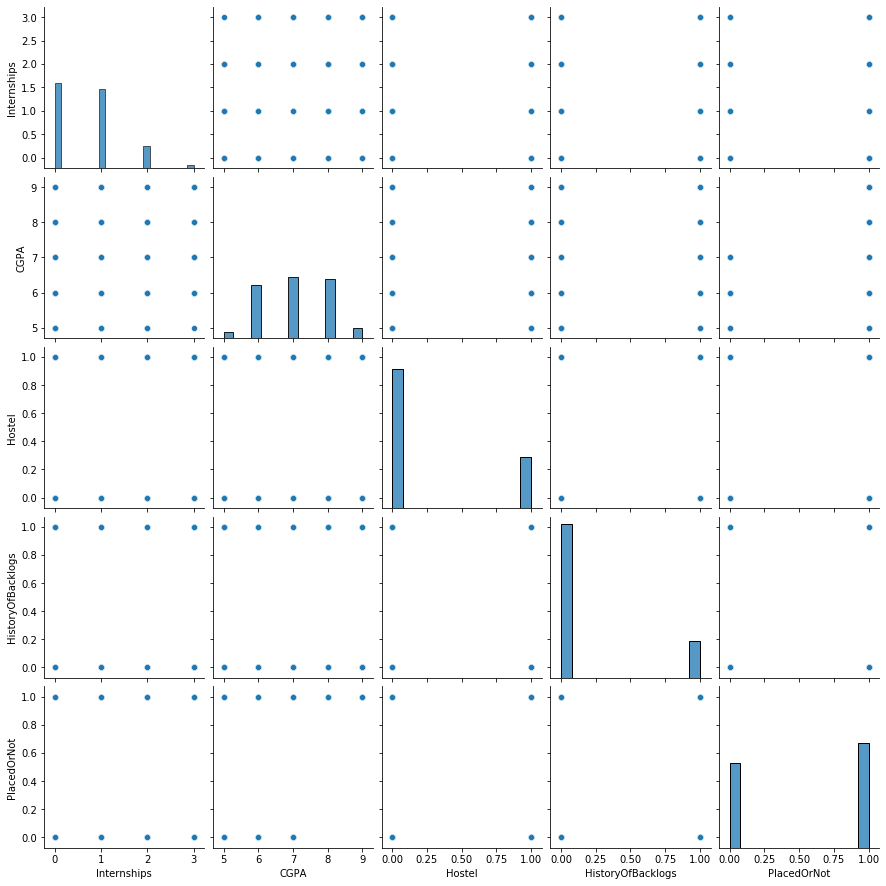

In [52]:
sns.pairplot(dataset)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [54]:
calc_vif(dataset[["Gender","Internships"]])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

#### Independant Sample- Unpaired T Test
Diferrent Group(Male, Female) but same contion(salary)

In [39]:
dataset[dataset['Gender']=='F']["Internships"]

Series([], Name: Internships, dtype: float64)

In [40]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male = dataset[dataset['Gender']=='M']['Internships']
female = dataset[dataset['Gender']=='F']['Internships']
#print(male)
ttest_ind(male,female)

Ttest_indResult(statistic=nan, pvalue=nan)

#### Dependant Sample-Paired T_Test
Same Group(Male) but Different Condition(ssc_p,hsc_p)


In [22]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['Gender']=='M']['CGPA']
male1 = dataset[dataset['Gender']=='M']['Internships']
ttest_rel(male, male1)


Ttest_relResult(statistic=nan, pvalue=nan)

In [ ]:
# Hypothesis Testing

In [ ]:
#Statement: Test whether SSC_p of male and HSC_P of Male is Same?

In [ ]:
#Null hypothesis=There is no similarity between 10th pass mark of male  and 12th pass mark of male

In [ ]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['Gender']=='M']['Internships']
male1 = dataset[dataset['Gender']=='M']['PlacedOrNot']
ttest_rel(male, male1)


# Reject Null hypothesis p<0.05
# Accept Null Hypothesi and Reject Alternate hypothsis

# ANAVO : Analysis of Variance

In [ ]:
import scipy.stats as stats

stats.f_oneway(dataset['Internships'],dataset['CGPA'],dataset['PlacedOrNot'])
